# In this notebook: # 
<br>


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.patches as mpatches
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)


colors=['lightpink','bisque','paleturquoise','lightskyblue']
#lightskyblue - new
#lightpink - one-time
#paleturquoise - regular
#bisque - return

In [2]:
#aggregations done in SQL
    #customer table, geography, total aggregated sales, customer type contribution
customer_df = pd.read_csv('customers.csv')
geo_df = pd.read_csv('customer_geo.csv')
total_df = pd.read_csv('customer_total.csv')
customer_contribution = pd.read_csv('customer_contribution.csv')

In [3]:
customer_df.head(50)

,CustomerID,CustomerStatus,Country,Units,Spent,Order_Count
0,12346-UK,One time,United Kingdom,74215,77183.60,1
1,12347-ICLD,Return,Iceland,2458,4310.00,7
2,12348-FIN,Return,Finland,2341,1797.24,4
3,12349-ITLY,One time,Italy,631,1757.55,1
4,12350-NORW,One time,Norway,197,334.40,1
5,12352-NORW,Return,Norway,536,2506.04,8
6,12353-BAHR,One time,Bahrain,20,89.00,1
7,12354-SPN,One time,Spain,530,1079.40,1
8,12355-BAHR,One time,Bahrain,240,459.40,1
9,12356-PORT,Return,Portugal,1591,2811.43,3


In [4]:
customer_df.describe()

,Units,Spent,Order_Count
count,4343.000000,4343.000000,4343.000000
mean,1192.702510,2051.287318,4.266175
std,5053.345545,8984.138421,7.701991
min,1.000000,0.000000,1.000000
25%,160.000000,307.245000,1.000000
50%,379.000000,673.100000,2.000000
75%,992.500000,1661.385000,5.000000
max,197491.000000,280206.020000,210.000000


In [5]:
customer_df.describe(include='object')

,CustomerID,CustomerStatus,Country
count,4343,4343,4343
unique,4343,4,36
top,12346-UK,One time,United Kingdom
freq,1,1500,3921


# Analysis of customer type #

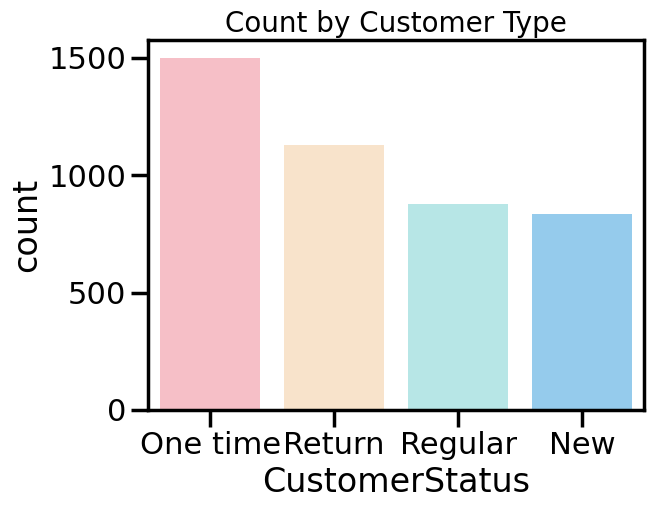

In [6]:
groups = customer_df.groupby(['CustomerStatus']).agg(count=('CustomerStatus','count'))
groups = groups.reset_index()
groups = groups.sort_values(by='count',ascending=False)

sns.set_context('poster')
sns.barplot(data=groups, x='CustomerStatus',y='count',palette=['lightpink','bisque','paleturquoise','lightskyblue'])
plt.title('Count by Customer Type',fontsize=20)
plt.show()

In [7]:
groups = customer_df.groupby(['CustomerStatus']).agg(add=("CustomerStatus",'sum'))
groups = groups.reset_index()
groups = groups.sort_values(by='add',ascending=False)

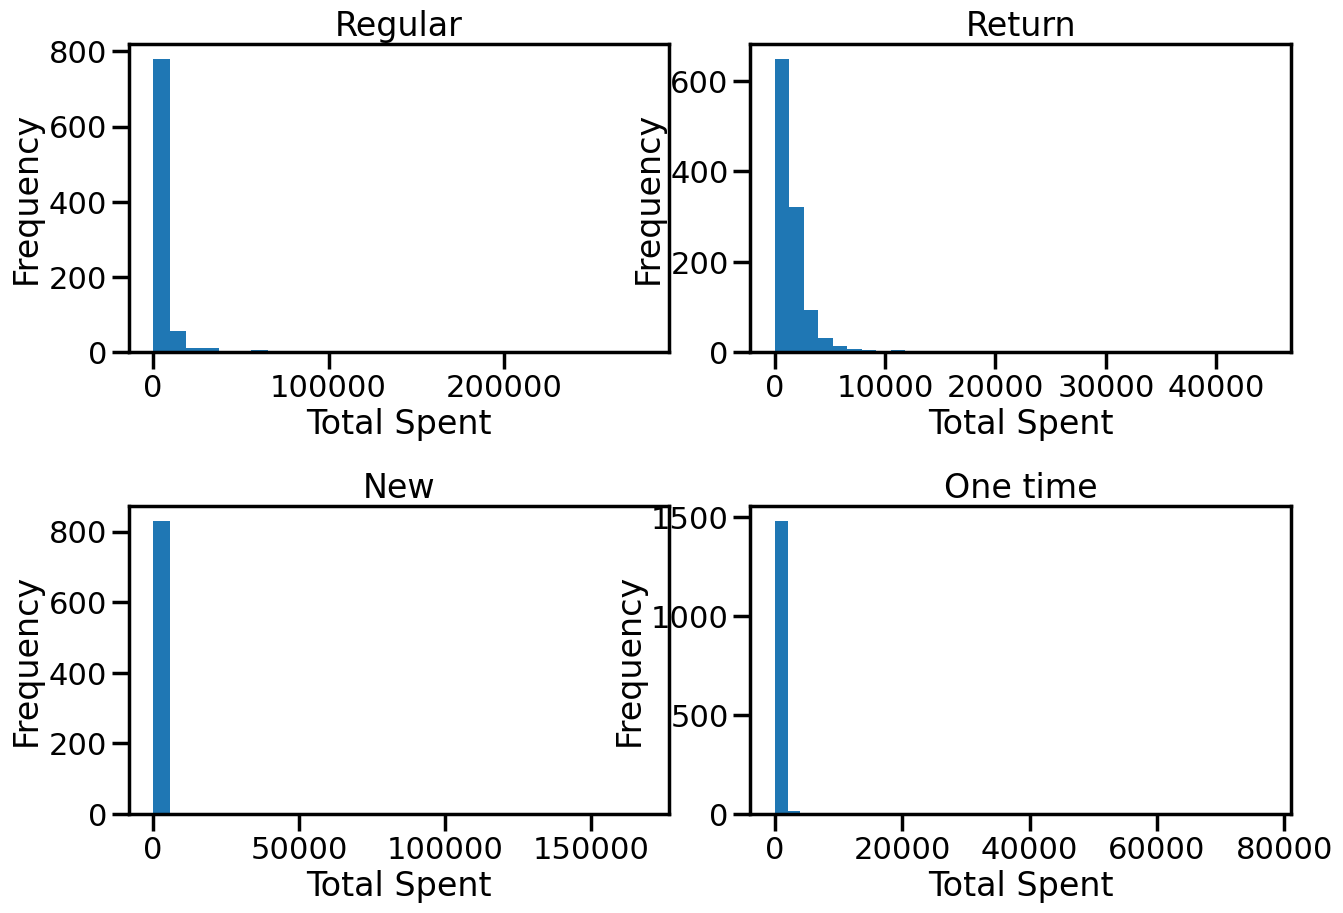

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(hspace = .5, wspace = .15)

types = ['Regular', 'Return', 'New', 'One time']


for customer, ax in zip(types, axs.ravel()):
    current = customer_df.loc[customer_df['CustomerStatus'] ==  customer]
    n = len(current)
    bins = int(round(math.sqrt(n)))
    bin_width = (max(current['Spent'])-min(current['Spent']))/math.sqrt(n)
    
    customer_df['Spent'].loc[customer_df['CustomerStatus'] == customer].plot(kind='hist', ax=ax, bins=bins)
    
    ax.set_title(customer)
    ax.set_xlabel('Total Spent')
    
plt.show()

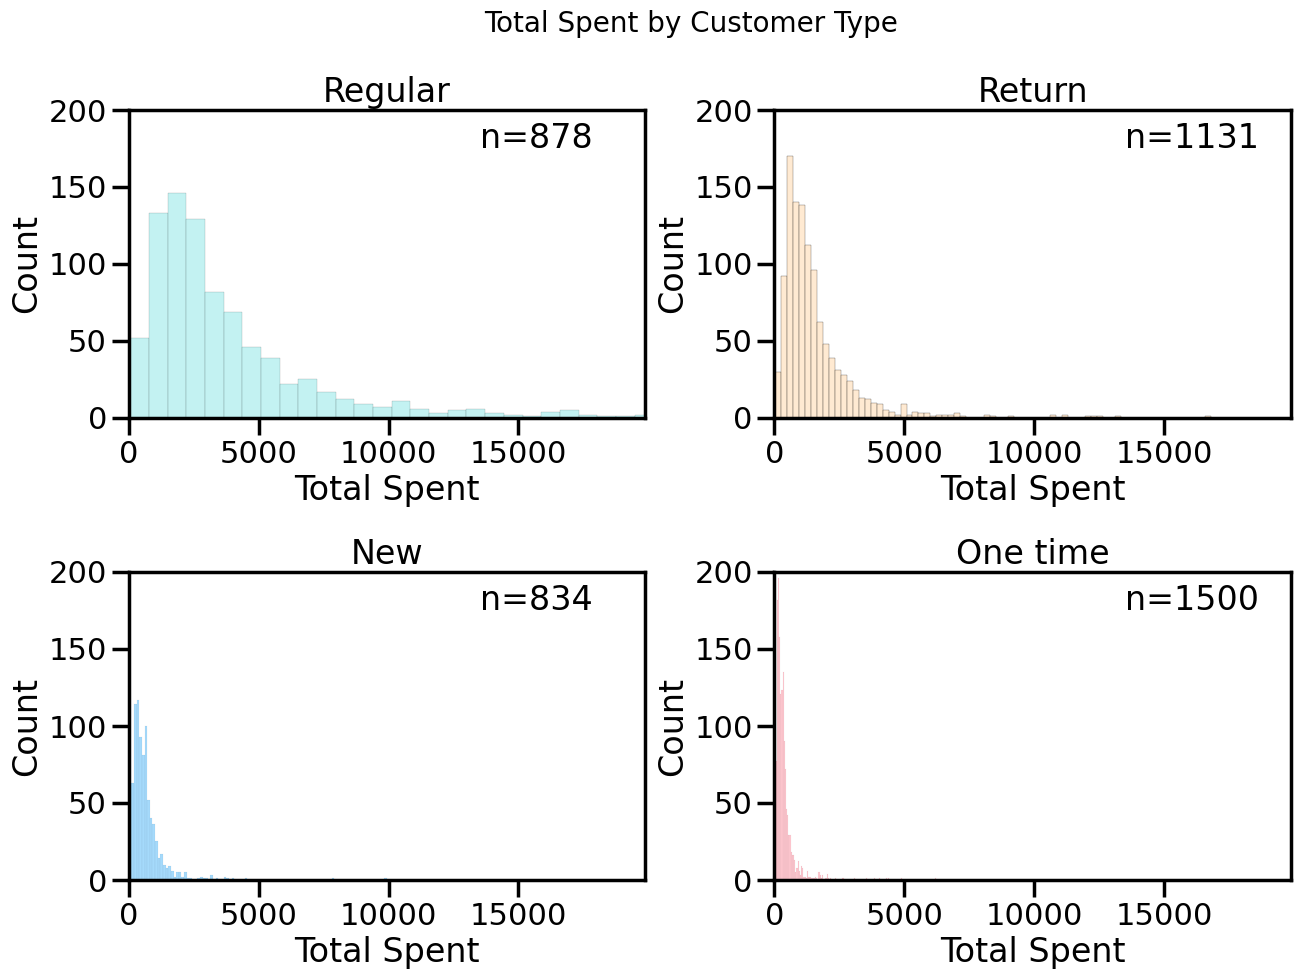

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(hspace = .5, wspace = .25)
sns.set_context('poster')

types = ['Regular', 'Return', 'New', 'One time']
colors=['paleturquoise','bisque','lightskyblue','lightpink']
i=0

for customer, ax in zip(types, axs.ravel()):
    current = customer_df.loc[customer_df['CustomerStatus'] ==  customer]
    n = len(current)
    bins = int(round(math.sqrt(n)))
    bin_width = (max(current['Spent'])-min(current['Spent']))/math.sqrt(n)
    
    plot = sns.histplot(data=current, x='Spent', ax=ax, color=colors[i])
    
    upper = np.percentile(np.array(customer_df['Spent']),99)
    
    ax.set_xlim(0, upper)
    ax.set_title(customer)
    ax.set_xlabel('Total Spent')
    ax.set_ylim(0,200)
    plot.annotate('n='+str(n), xy=(13500,175))
    i+=1
    

plt.suptitle('Total Spent by Customer Type', fontsize=20)
plt.show()

In [10]:
groups = customer_df.groupby(['CustomerStatus','Spent'])
groups

In [11]:
#plotting % gross from each customer type

gross = customer_contribution[['Regular - Gross', 'Return - Gross', 'New - Gross', 'One-time - Gross']].copy()
units = customer_contribution[['Regular - Units', 'Return - Units', 'New - Units', 'One-time - Units']].copy()
orders = customer_contribution[['Regular - Orders', 'Return - Orders', 'New - Orders', 'One-time - Orders']].copy()

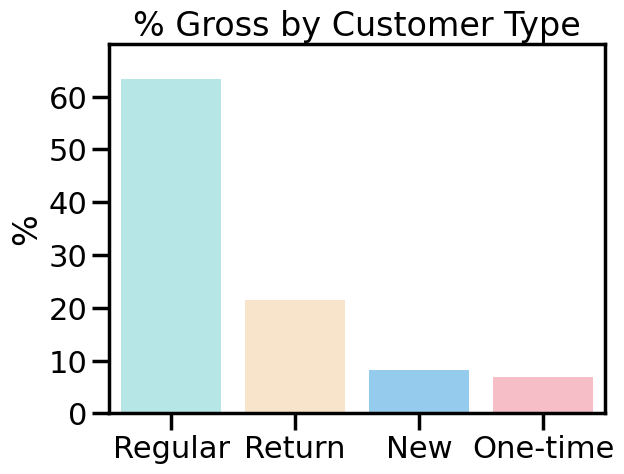

In [12]:
yticks = np.arange(0,70,10)
sns.set_context('poster')
plot = sns.barplot(data=gross,palette=colors)

plt.title('% Gross by Customer Type')
plot.set_yticks(yticks)
plot.set(xticklabels=['Regular','Return','New','One-time'])
plot.set_ylim(0,70)
plt.ylabel('%')
plt.show()


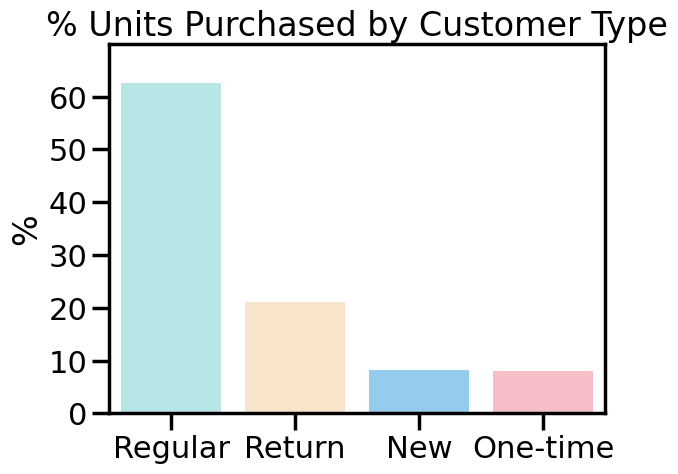

In [13]:
yticks = np.arange(0,70,10)
sns.set_context('poster')
plot = sns.barplot(data=units,palette=colors)

plt.title('% Units Purchased by Customer Type')
plot.set_yticks(yticks)
plot.set(xticklabels=['Regular','Return','New','One-time'])
plot.set_ylim(0,70)
plt.ylabel('%')

plt.show()

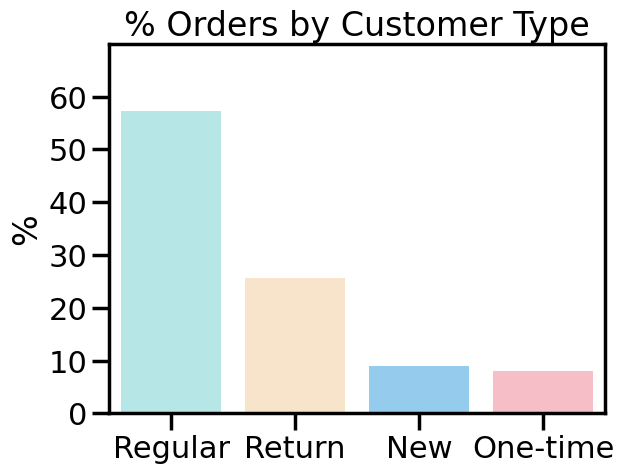

In [14]:
yticks = np.arange(0,70,10)
sns.set_context('poster')
plot = sns.barplot(data=orders,palette=colors)

plt.title('% Orders by Customer Type')
plot.set_yticks(yticks)
plot.set(xticklabels=['Regular','Return','New','One-time'])
plot.set_ylim(0,70)
plt.ylabel('%')

plt.show()

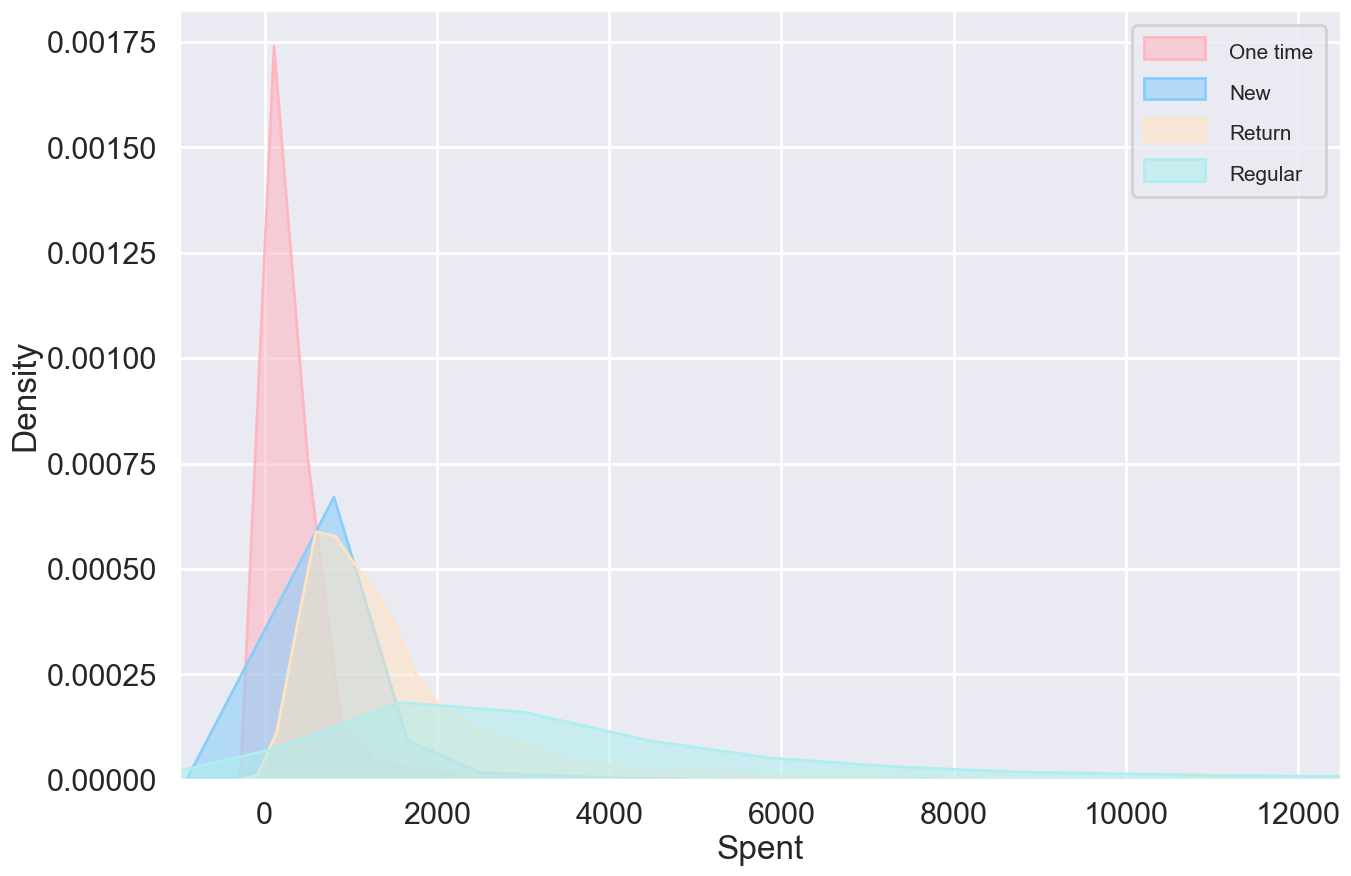

In [43]:
fig, axs = plt.subplots(figsize=(15,10))
sns.set_context('poster')
types = ['One time','New','Return','Regular']
colors = ['lightpink','lightskyblue','bisque','paleturquoise']
i = 0

for customer in types:
    data = customer_df['Spent'].loc[customer_df['CustomerStatus'] ==  customer]
    sns.kdeplot(data=data, cumulative=False,fill=True, color=colors[i],bw_adjust=0.2,alpha=0.56)
    i+=1

plt.legend(types)
plt.setp(axs.get_legend().get_texts(), fontsize='15')
plt.title('')
axs.set_xlim(-1000,12500)
plt.grid(True)
plt.show()

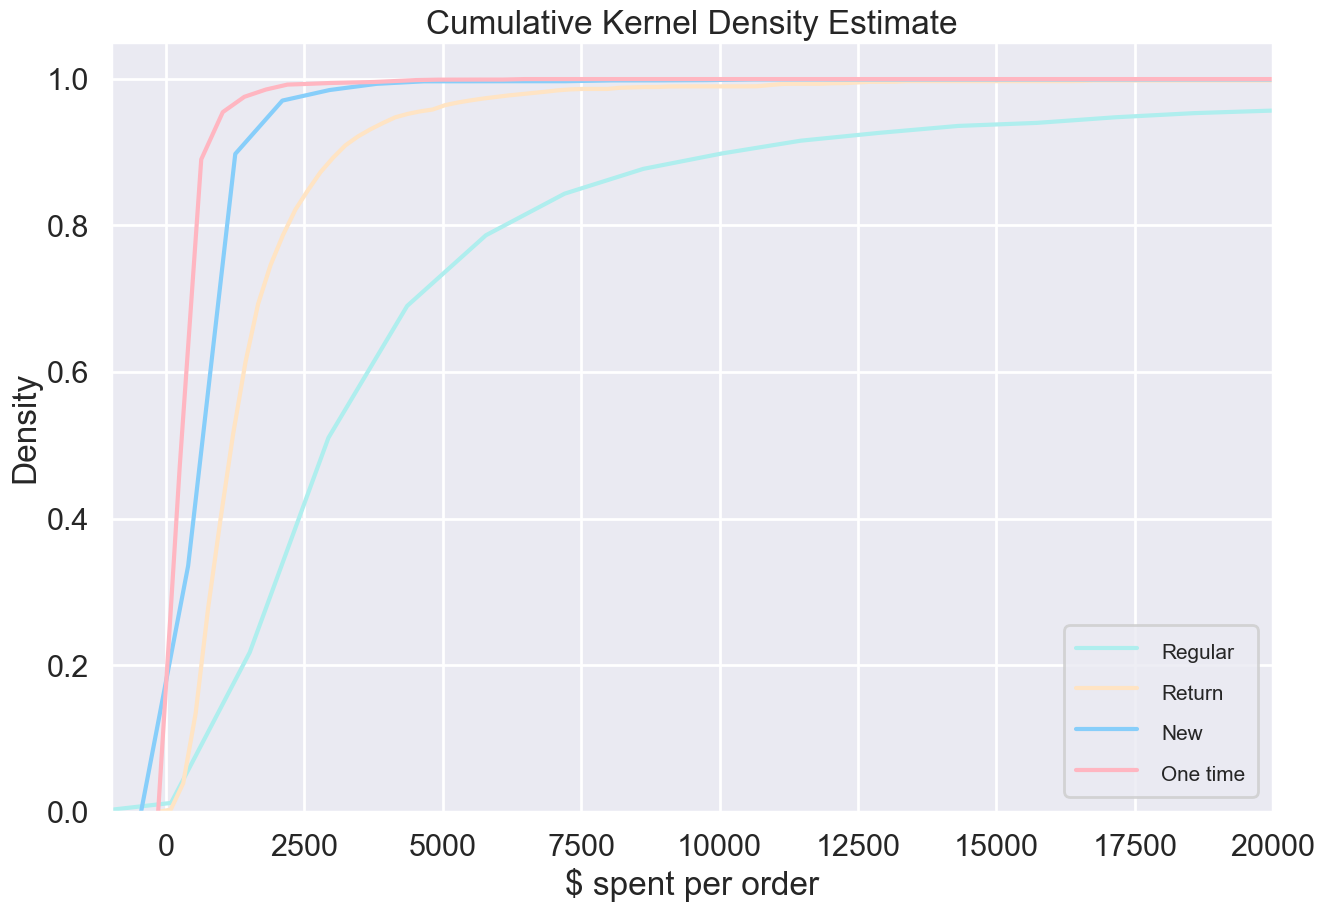

In [33]:
fig, axs = plt.subplots(figsize=(15,10))
sns.set_context('poster')
types = ['Regular', 'Return', 'New', 'One time']
colors = ['paleturquoise','bisque','lightskyblue','lightpink']
i = 0

for customer in types:
    data = customer_df['Spent'].loc[customer_df['CustomerStatus'] ==  customer]
    sns.kdeplot(data=data, cumulative=True, color=colors[i],bw_adjust=0.1)
    i+=1

plt.legend(types)
plt.setp(axs.get_legend().get_texts(), fontsize='15')
plt.title('Cumulative Kernel Density Estimate')
axs.set_xlim(-1000,20000)
plt.grid(True)
plt.xlabel('$ spent per order')
plt.show()

# probabilities #

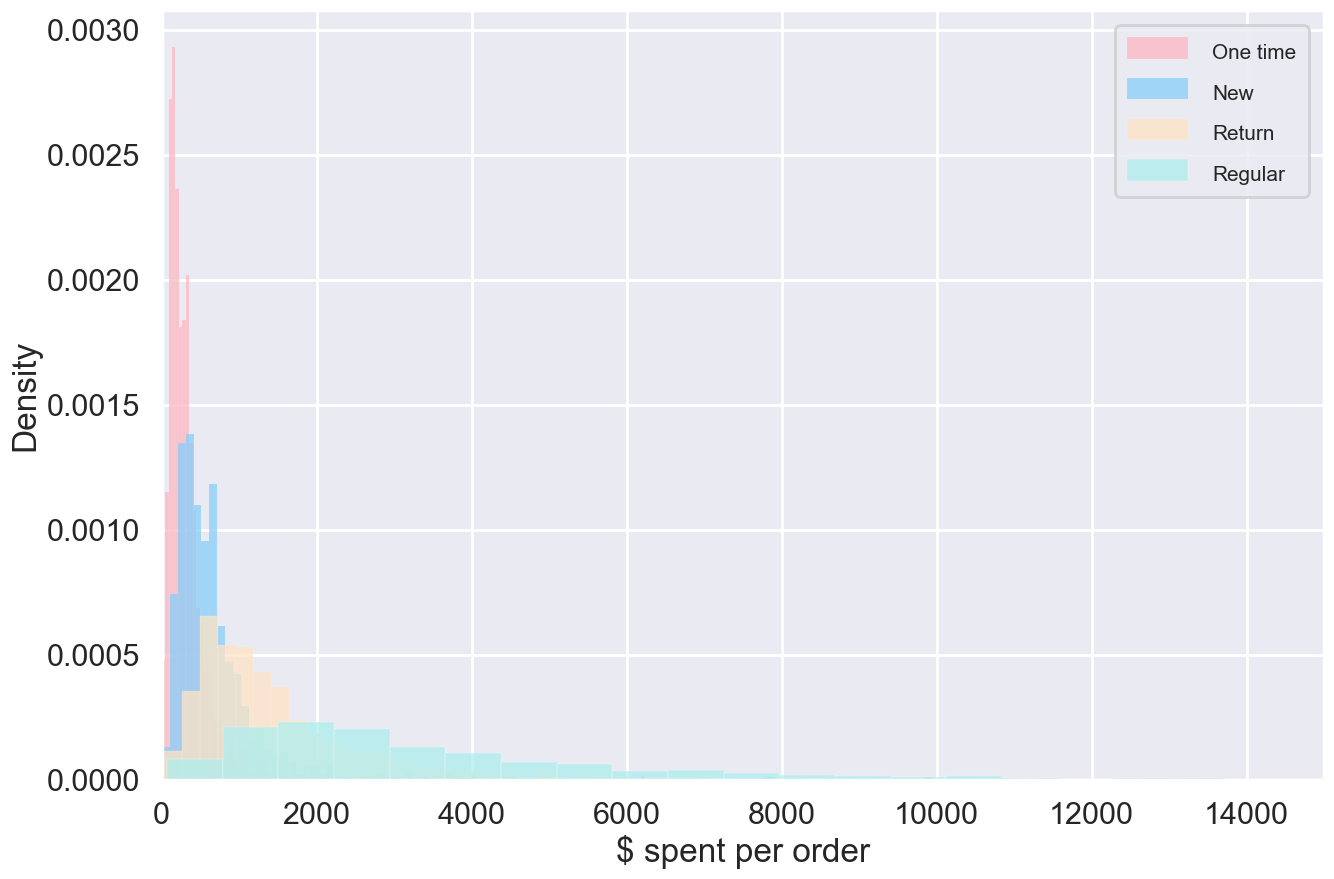

In [41]:
fig, axs = plt.subplots(figsize=(15,10))
sns.set_context('poster')
types = ['One time','New','Return','Regular']
colors = ['lightpink','lightskyblue','bisque','paleturquoise']
i = 0

for customer in types:
    data = customer_df['Spent'].loc[customer_df['CustomerStatus'] ==  customer]
    sns.histplot(data=data, color=colors[i], stat='density')
    i+=1

plt.legend(types)
plt.setp(axs.get_legend().get_texts(), fontsize='15')
plt.xlabel('$ spent per order')
axs.set_xlim(0,15000)
plt.show()

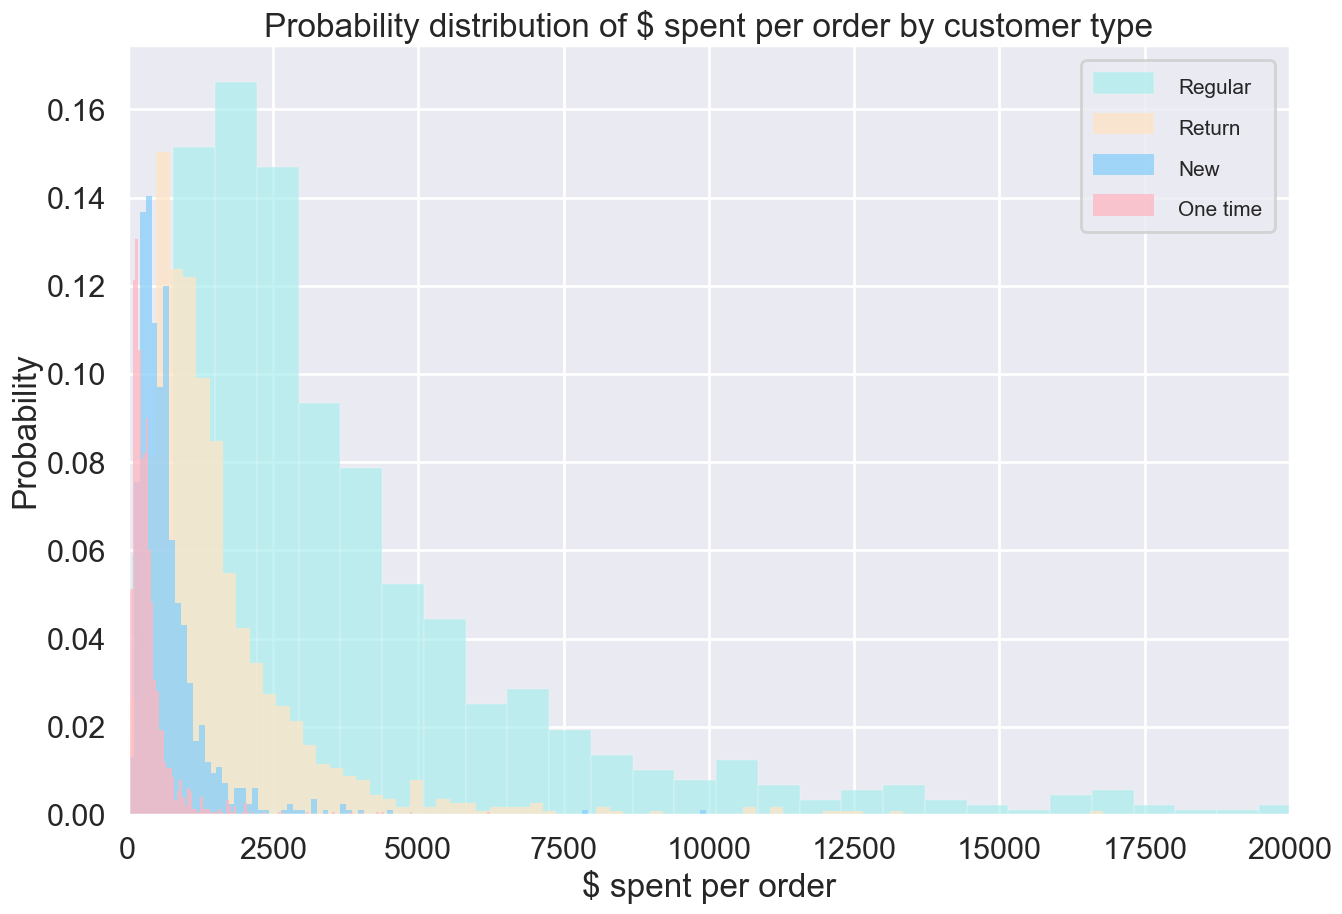

In [45]:
fig, axs = plt.subplots(figsize=(15,10))
sns.set_context('poster')
types = ['Regular', 'Return', 'New', 'One time']
colors = ['paleturquoise','bisque','lightskyblue','lightpink']
i = 0

for customer in types:
    data = customer_df['Spent'].loc[customer_df['CustomerStatus'] ==  customer]
    sns.histplot(data=data, color=colors[i], stat='probability')
    i+=1

plt.legend(types)
plt.setp(axs.get_legend().get_texts(), fontsize='15')
plt.title('Probability distribution of $ spent per order by customer type')
plt.xlabel('$ spent per order')
axs.set_xlim(0,20000)
plt.show()

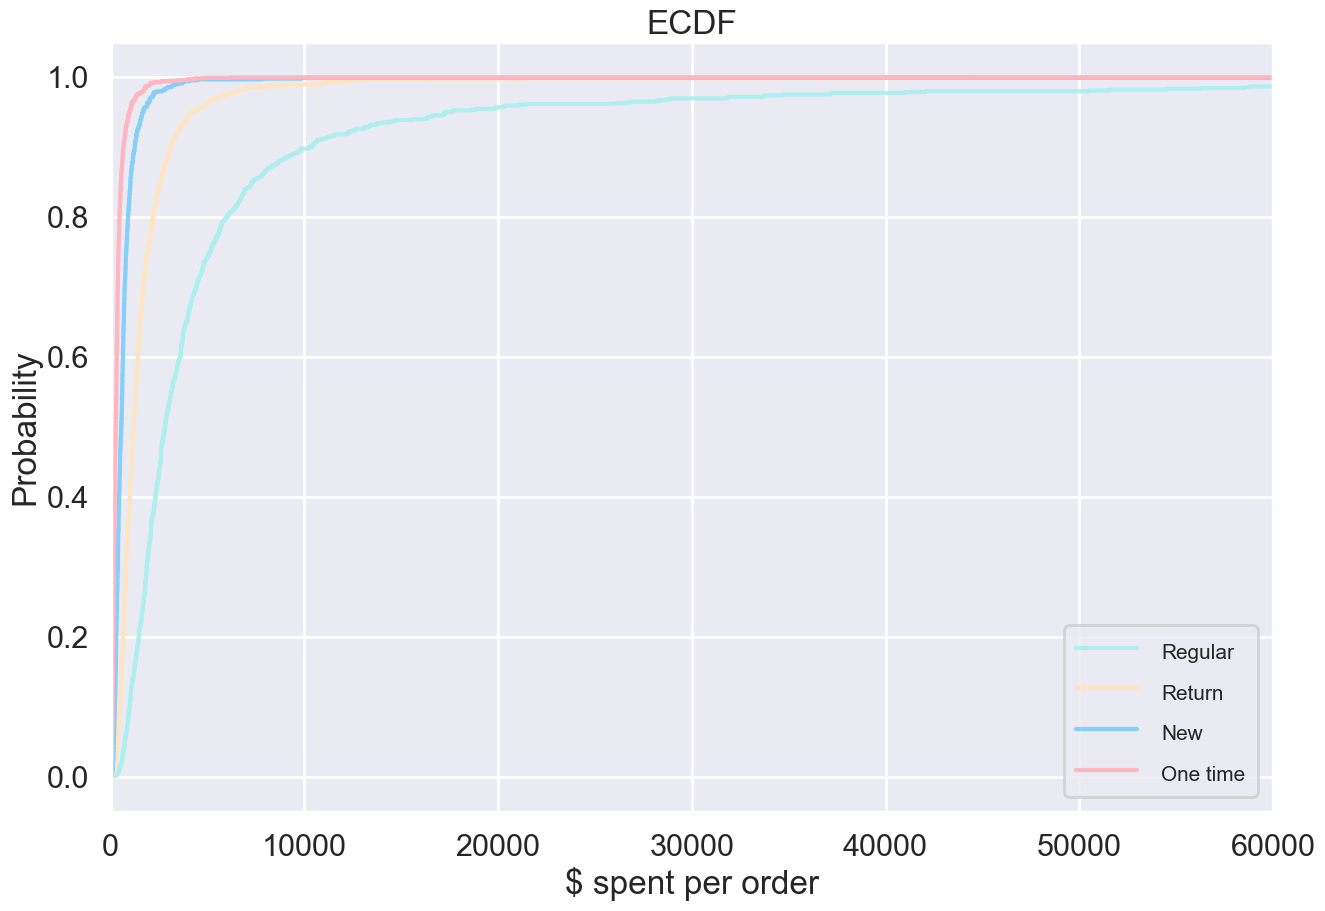

In [32]:
fig, axs = plt.subplots(figsize=(15,10))
sns.set_context('poster')
types = ['Regular', 'Return', 'New', 'One time']
colors = ['paleturquoise','bisque','lightskyblue','lightpink']
i = 0

for customer in types:
    data = customer_df['Spent'].loc[customer_df['CustomerStatus'] ==  customer]
    ecdf = ECDF(data)
    plt.step(ecdf.x,ecdf.y, where='post',color=colors[i])
    i+=1

plt.legend(types)
plt.setp(axs.get_legend().get_texts(), fontsize='15')
plt.grid(True)
axs.set_xlim(0,60000)
plt.title('ECDF')
plt.xlabel('$ spent per order')
plt.ylabel('Probability')
plt.show()